# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Fall 2019

### Part I: Hybrid Images

In [2]:
import cv2
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
from numpy.fft import fft2, fftshift

import utils

In [3]:
%matplotlib notebook

In [4]:
im1_file = 'images/Tsai_Ing-wen.png'
im2_file = 'images/Han_Kuo-Yu.jpg'
res_dir = 'results'
res_name = 'Tasi_kuo-Yu.png'

im1 = cv2.imread(im1_file, cv2.IMREAD_COLOR)
im2 = cv2.imread(im2_file, cv2.IMREAD_COLOR)

# im1 = cv2.imread(im1_file, 0)
# im2 = cv2.imread(im2_file, 0)

<IPython.core.display.Javascript object>


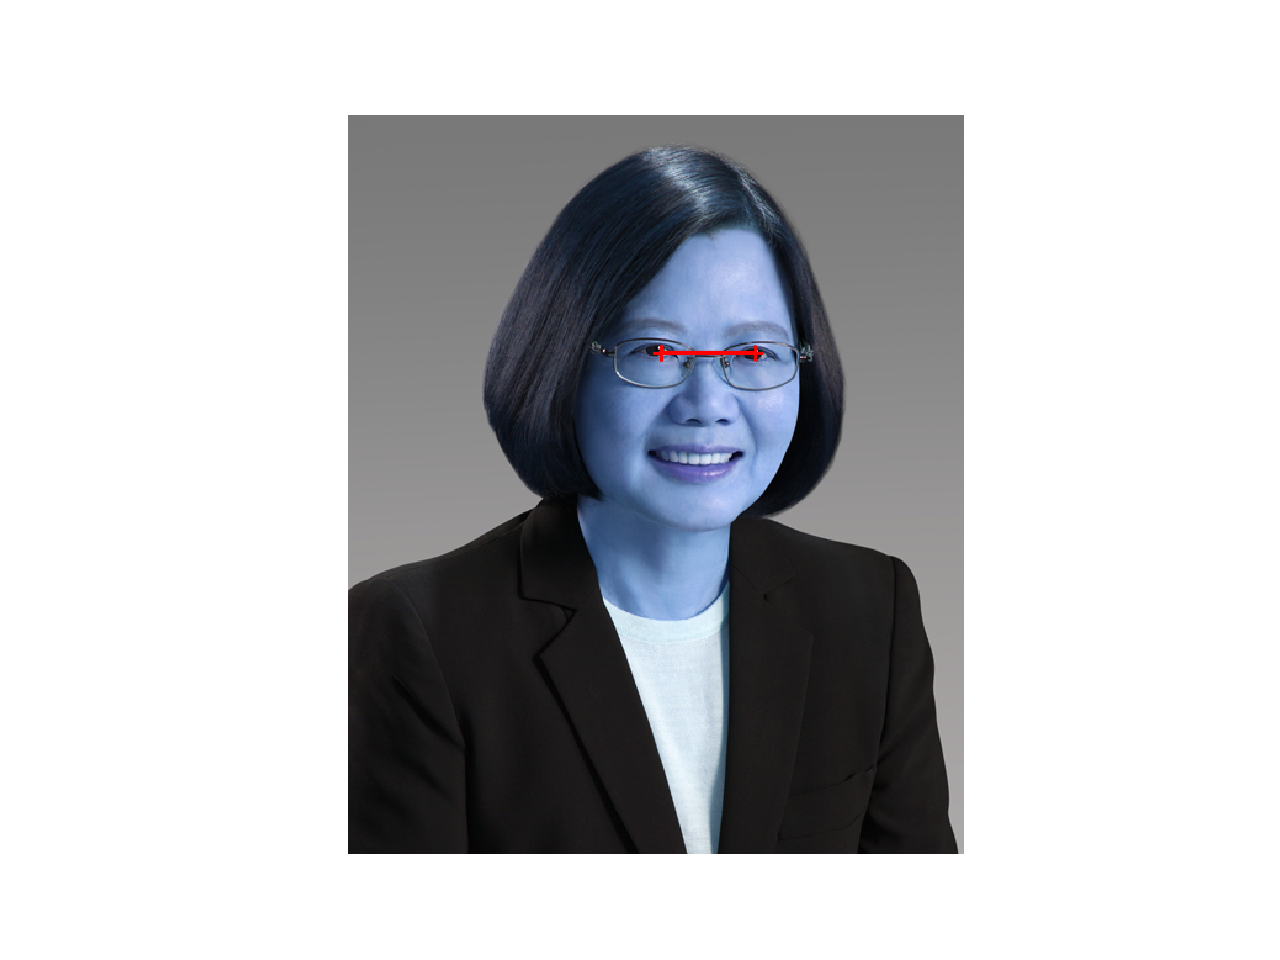

In [5]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


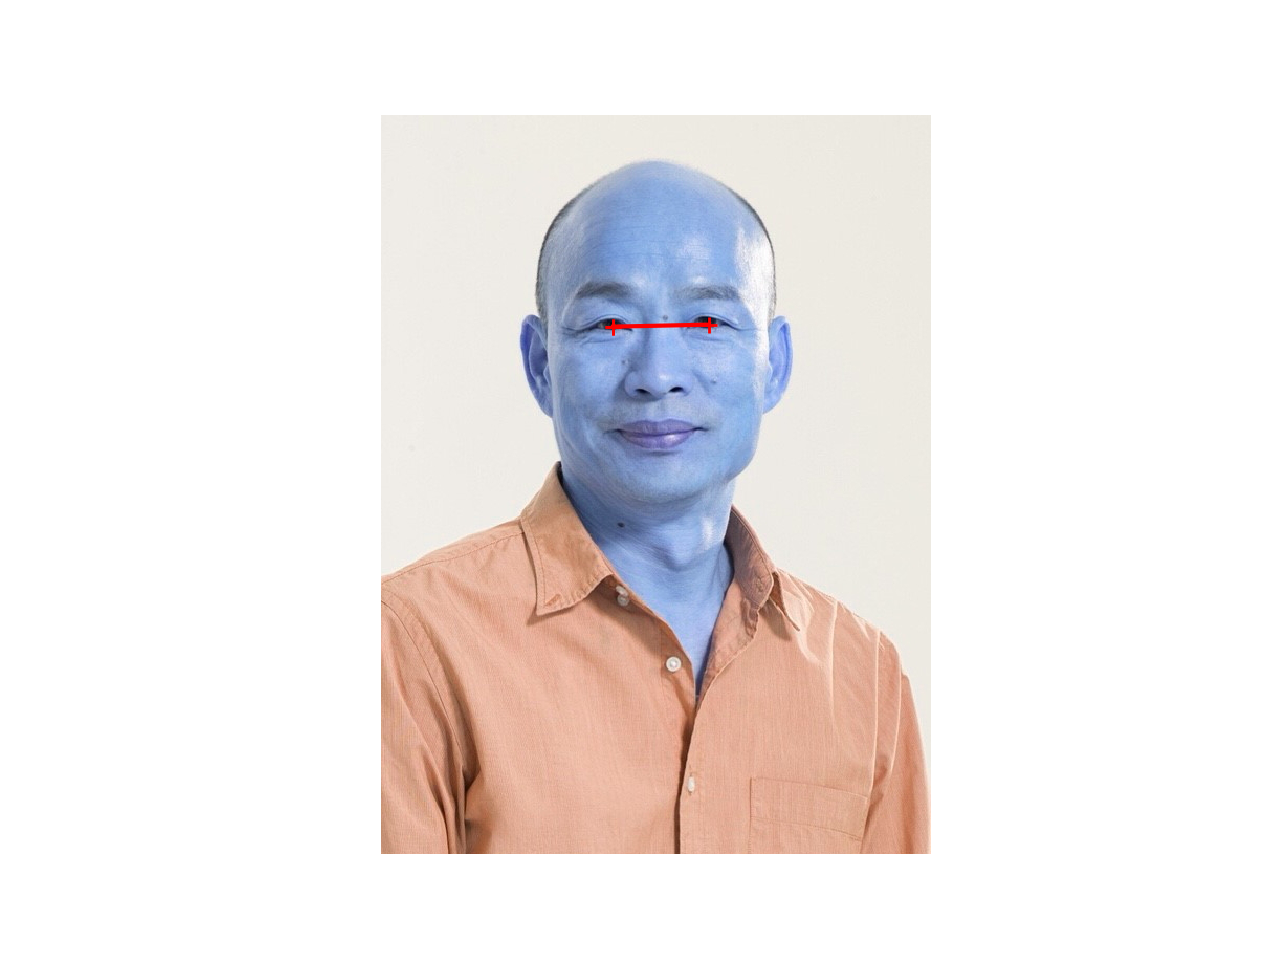

In [6]:
pts_im2 = utils.prompt_eye_selection(im2)

In [7]:
im1, im2 = utils.align_images(im1_file, im2_file, pts_im1, pts_im2, save_images=False)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

<IPython.core.display.Javascript object>


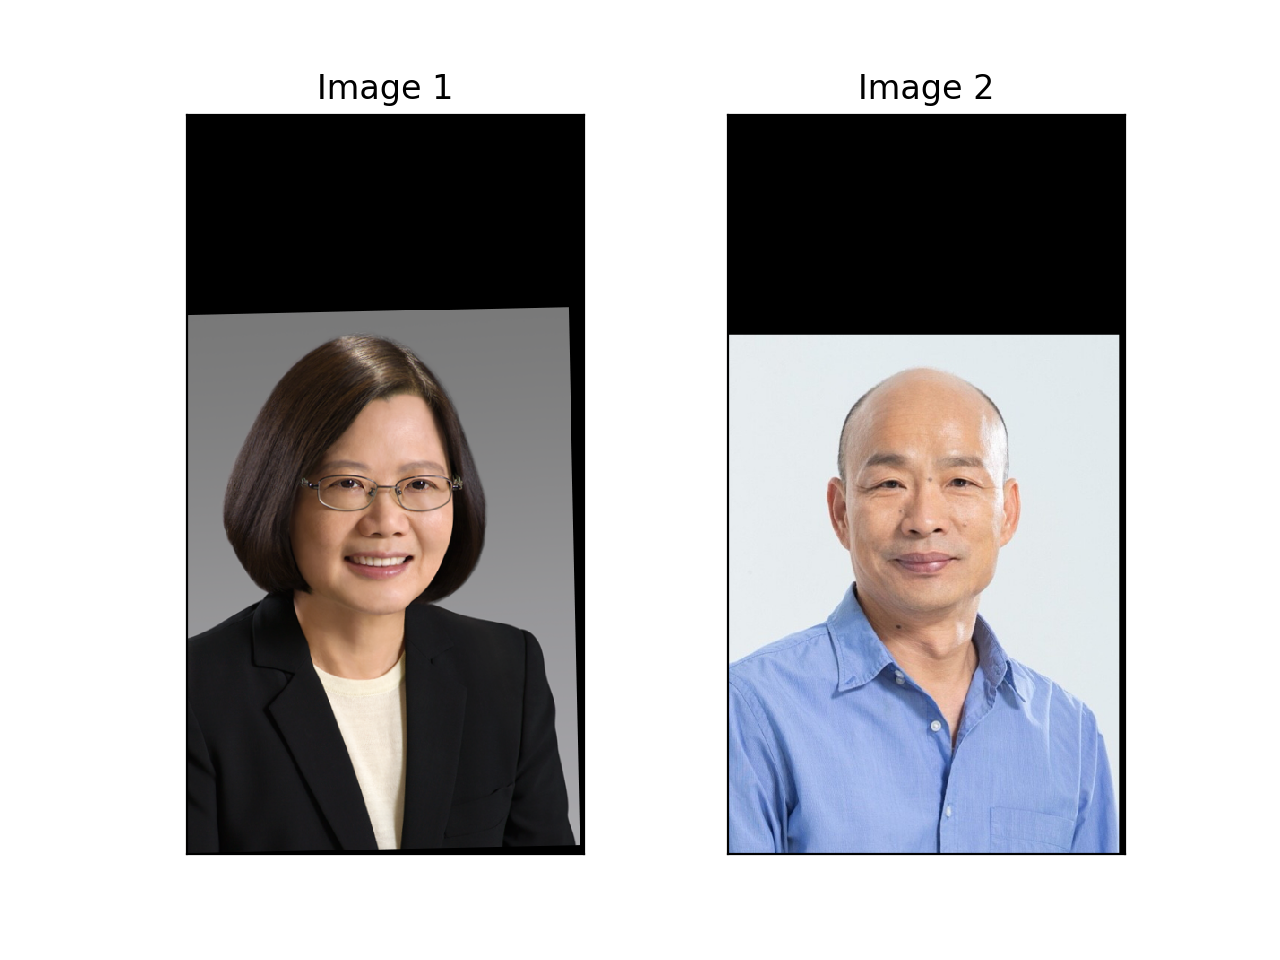

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2, cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [9]:
def correlate2d(kernel, img, mode='same'):
    img_filtered = None

    # Color image
    if len(img.shape) > 2:
        for c in range(img.shape[2]):
            img_tmp = signal.correlate2d(img[:, :, c], kernel, mode=mode)
            if img_filtered is None:
                img_filtered = np.zeros((img_tmp.shape[0], img_tmp.shape[1], img.shape[2]))
            img_filtered[:, :, c] = img_tmp
    else:
        img_filtered = signal.correlate2d(img, kernel, mode=mode)
        
    return img_filtered

In [10]:
def plot_no_frame(img, title=None):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    dpi = fig.get_dpi()
    fig.set_size_inches(img.shape[1]/float(dpi), img.shape[0]/float(dpi))

    ax.imshow(img, cmap='gray')
    fig.savefig(os.path.join(res_dir, res_name))
    return fig

In [11]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''    

    low_pass  = utils.gaussian_kernel(cutoff_low, 3 * cutoff_low)  
    high_pass = utils.gaussian_kernel(cutoff_high, 3 * cutoff_high)
    
    im2_low_passed  = correlate2d(low_pass, im2)
    im1_high_passed = im1 - correlate2d(high_pass, im1) + 127
    im1_high_passed[np.where(im1_high_passed > 255)] = 255
    
    im_hybrid = (im2_low_passed + im1_high_passed) / 2
    im_hybrid = im_hybrid.astype(np.uint8)
    
    # Fourier Analysis
    # Only plot fft results for one-dimension image
    if len(im1.shape) == 2:
        im1_fft = np.log(np.abs(fftshift(fft2(im1))))
        im2_fft = np.log(np.abs(fftshift(fft2(im2))))
        im2_low_passed_fft = np.log(np.abs(fftshift(fft2(im2_low_passed))))
        im1_high_passed_fft = np.log(np.abs(fftshift(fft2(im1_high_passed))))
        im_hybrid_fft = np.log(np.abs(fftshift(fft2(im_hybrid))))
    
        fig1 = plot_no_frame(im1_fft)
        fig1.savefig(os.path.join(res_dir, 'img1_fft.png'))

        fig2 = plot_no_frame(im2_fft)
        fig2.savefig(os.path.join(res_dir, 'img2_fft.png'))
        
        fig3 = plot_no_frame(im1_high_passed_fft)
        fig3.savefig(os.path.join(res_dir, 'img1_hp_fft.png'))
        
        fig4 = plot_no_frame(im2_low_passed_fft)
        fig4.savefig(os.path.join(res_dir, 'img2_lp_fft.png'))
        
        fig5 = plot_no_frame(im_hybrid_fft)
        fig5.savefig(os.path.join(res_dir, 'img_hybrid_fft.png'))
    
    return im_hybrid

In [12]:
# arbitrary_value = 20  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = 5
cutoff_high = 15

im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


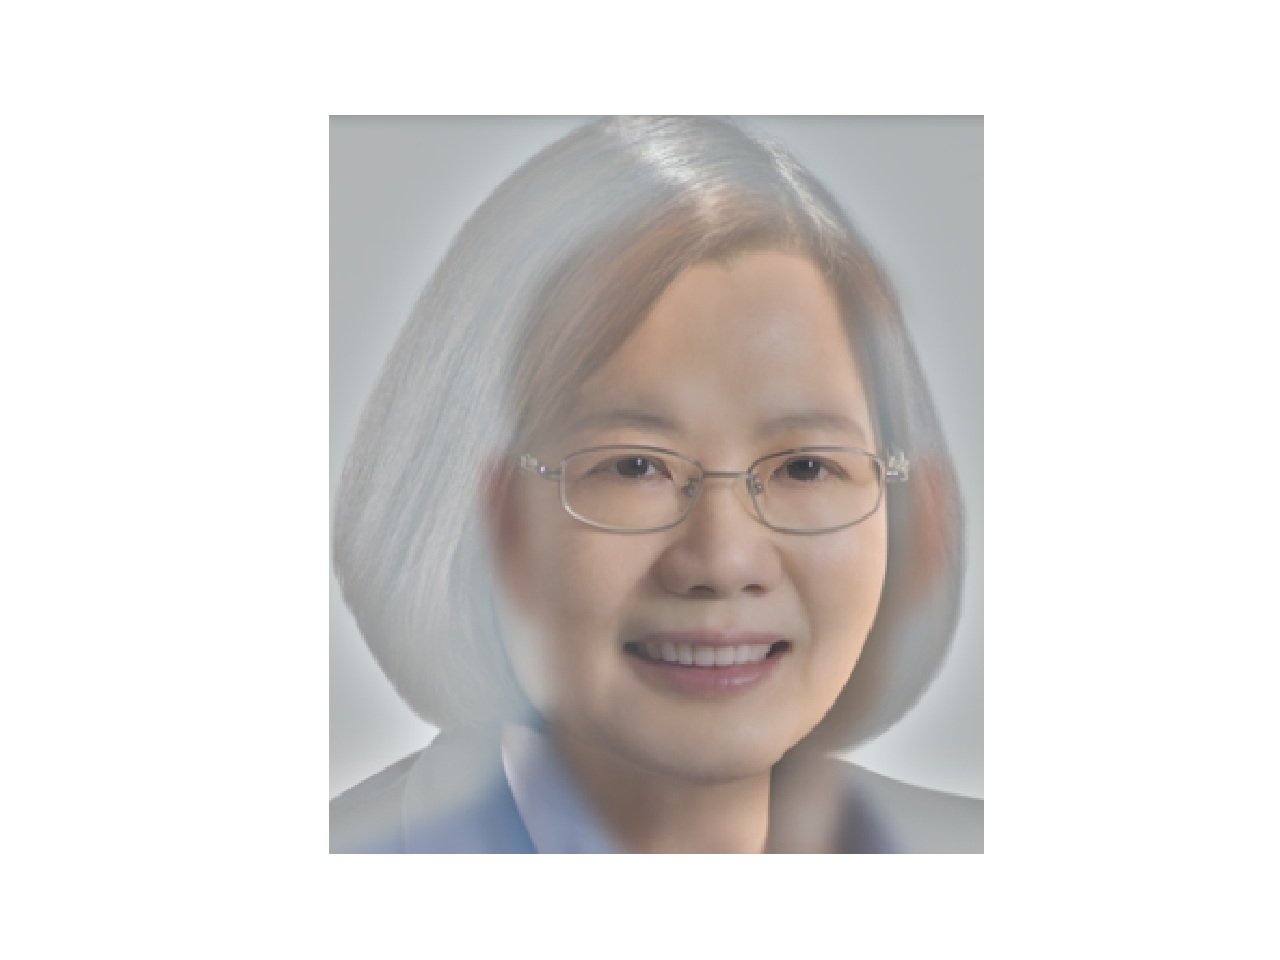

In [13]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

<IPython.core.display.Javascript object>


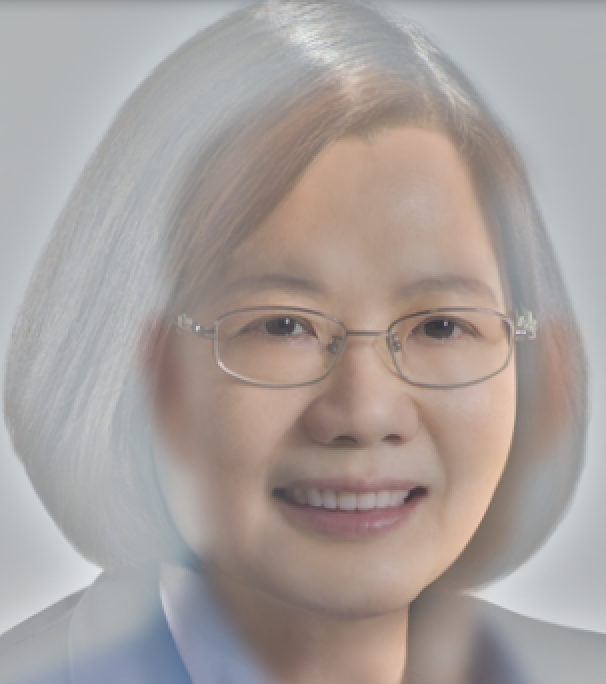

In [14]:
img_out = cropped_object['cropped_image']
fig = plot_no_frame(img_out)
fig.savefig(os.path.join(res_dir, res_name))

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


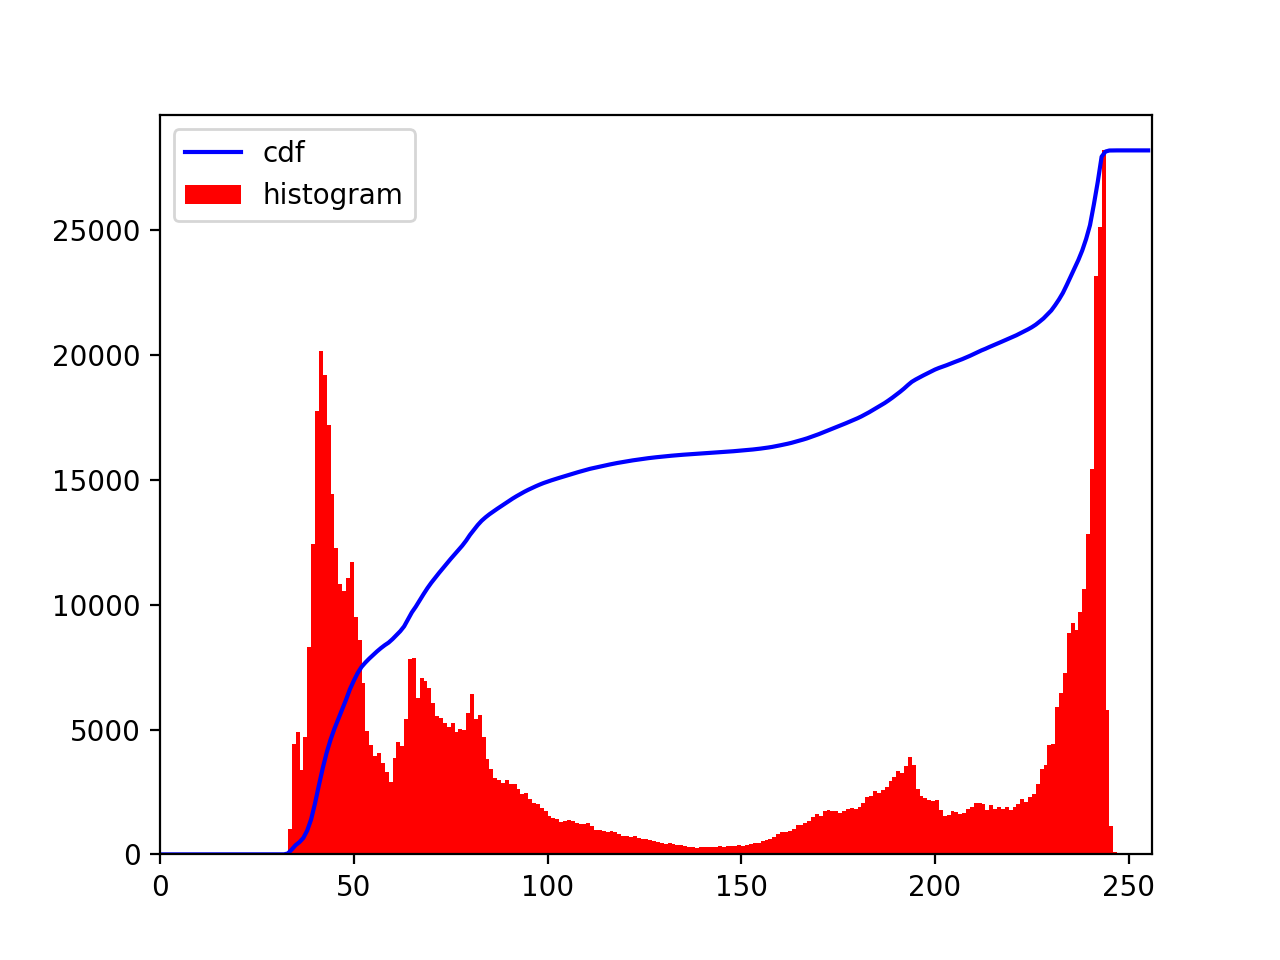

<IPython.core.display.Javascript object>


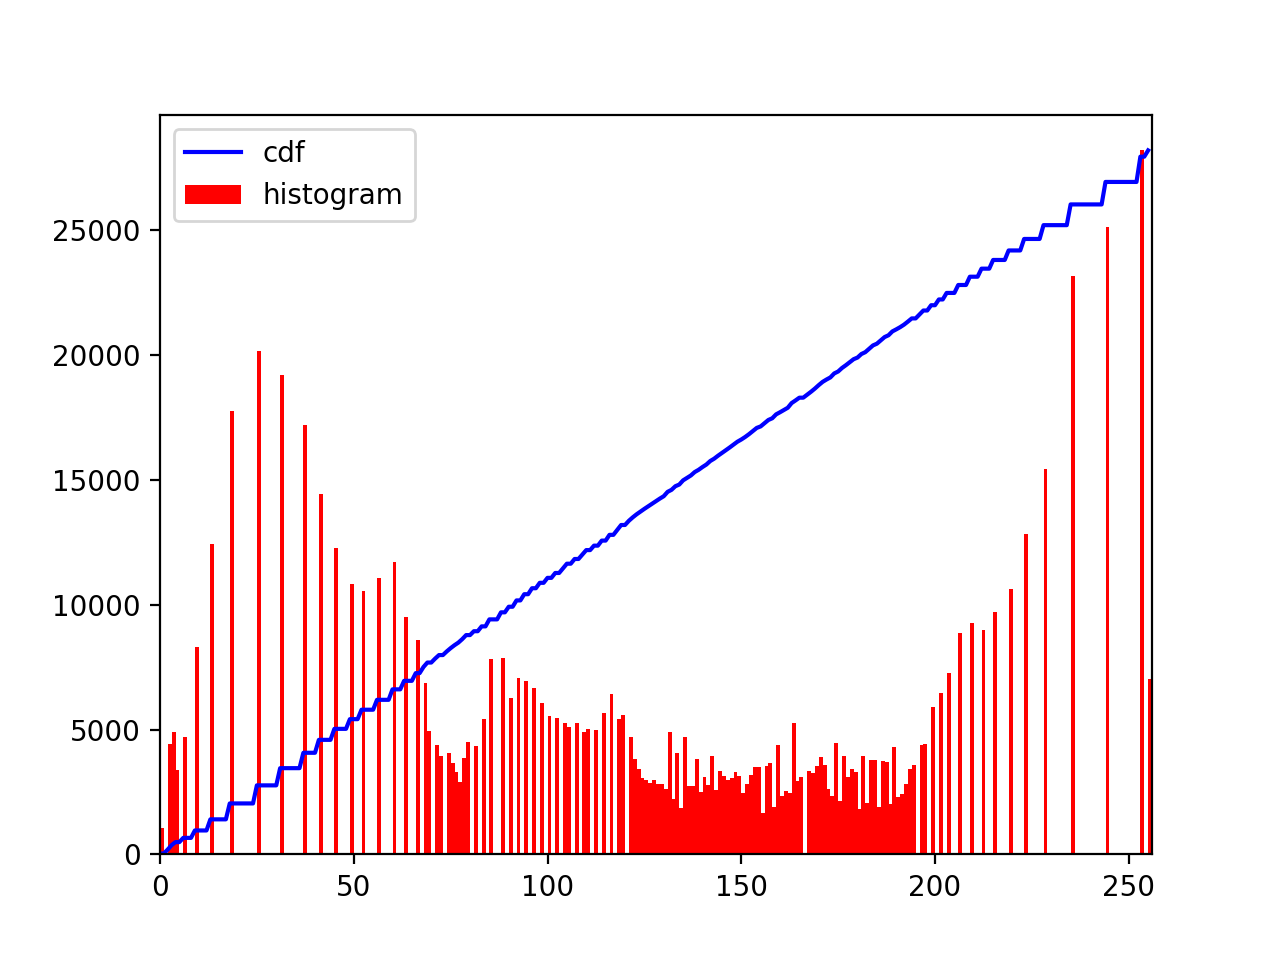

<IPython.core.display.Javascript object>


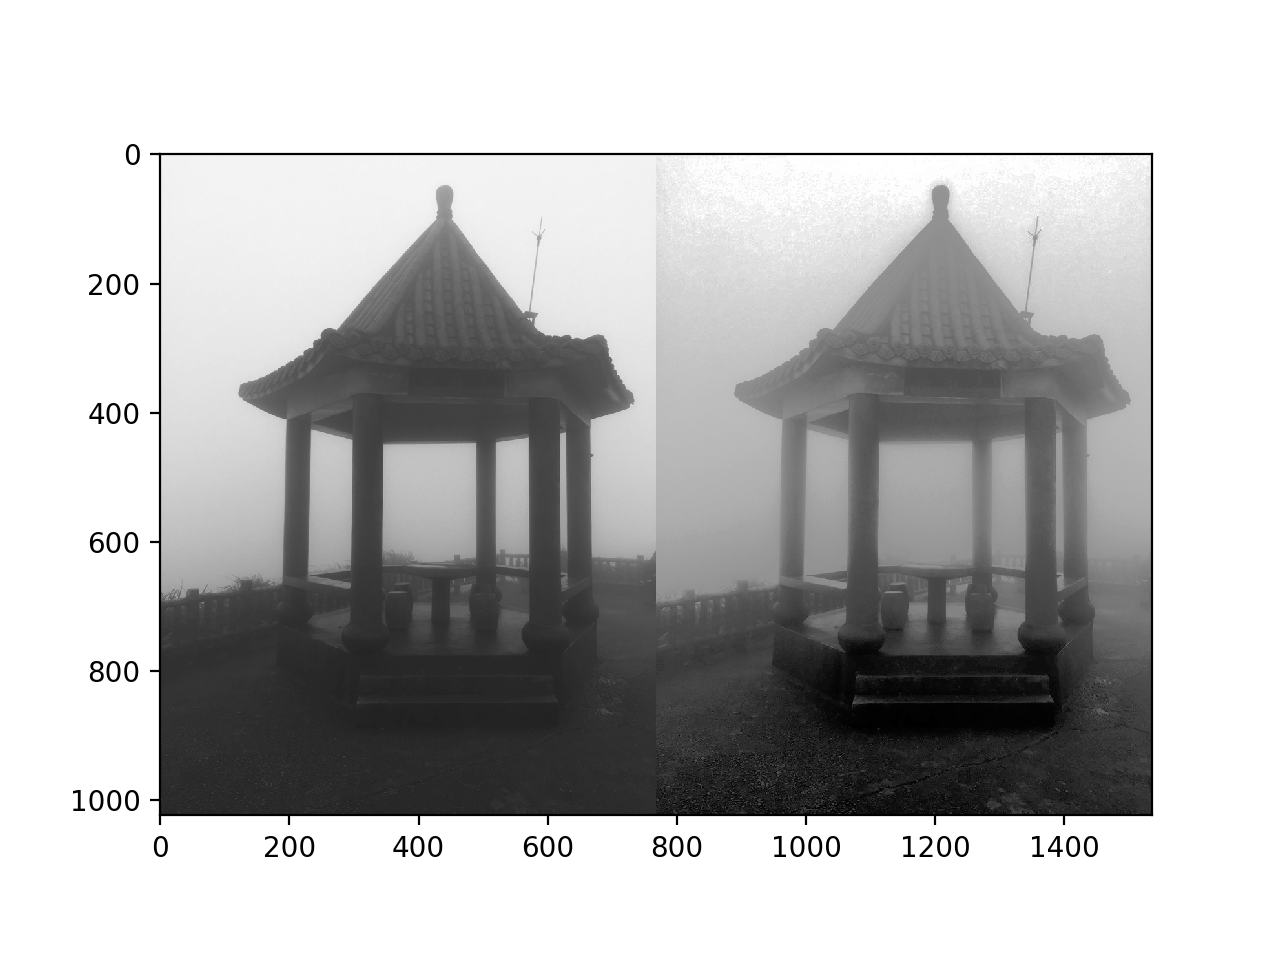

True

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/low-contrast-gray.jpg', 0)

# Histogram equalization
hist, bins = np.histogram(img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

equ = cv2.equalizeHist(img)

# Plot result histogram
hist, bins = np.histogram(equ.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

res = np.hstack((img, equ))
plt.figure()
plt.imshow(res, cmap="gray")
cv2.imwrite('results/contrast-enhanced.png', res)

#### Color enhancement 

<IPython.core.display.Javascript object>


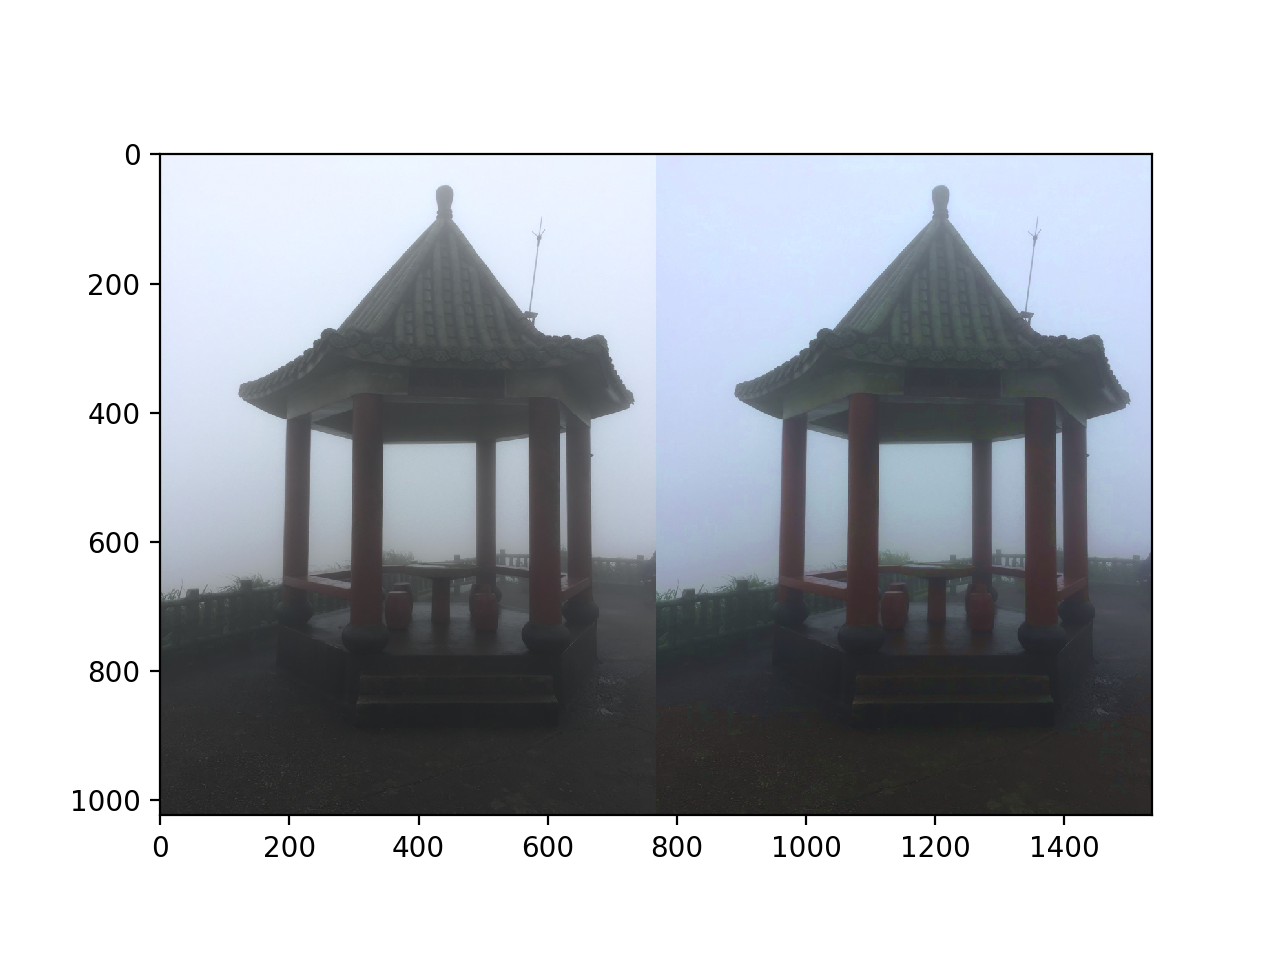

True

In [16]:
img = cv2.imread('images/low-contrast.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Increase saturation channel
img_hsv[:,:,1] += 20

# Convert the HSV image back to RGB format
equ = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

res = np.hstack((img, equ))
res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(res_rgb)
cv2.imwrite('results/color-enhanced.png', res)

#### Color shift

<IPython.core.display.Javascript object>


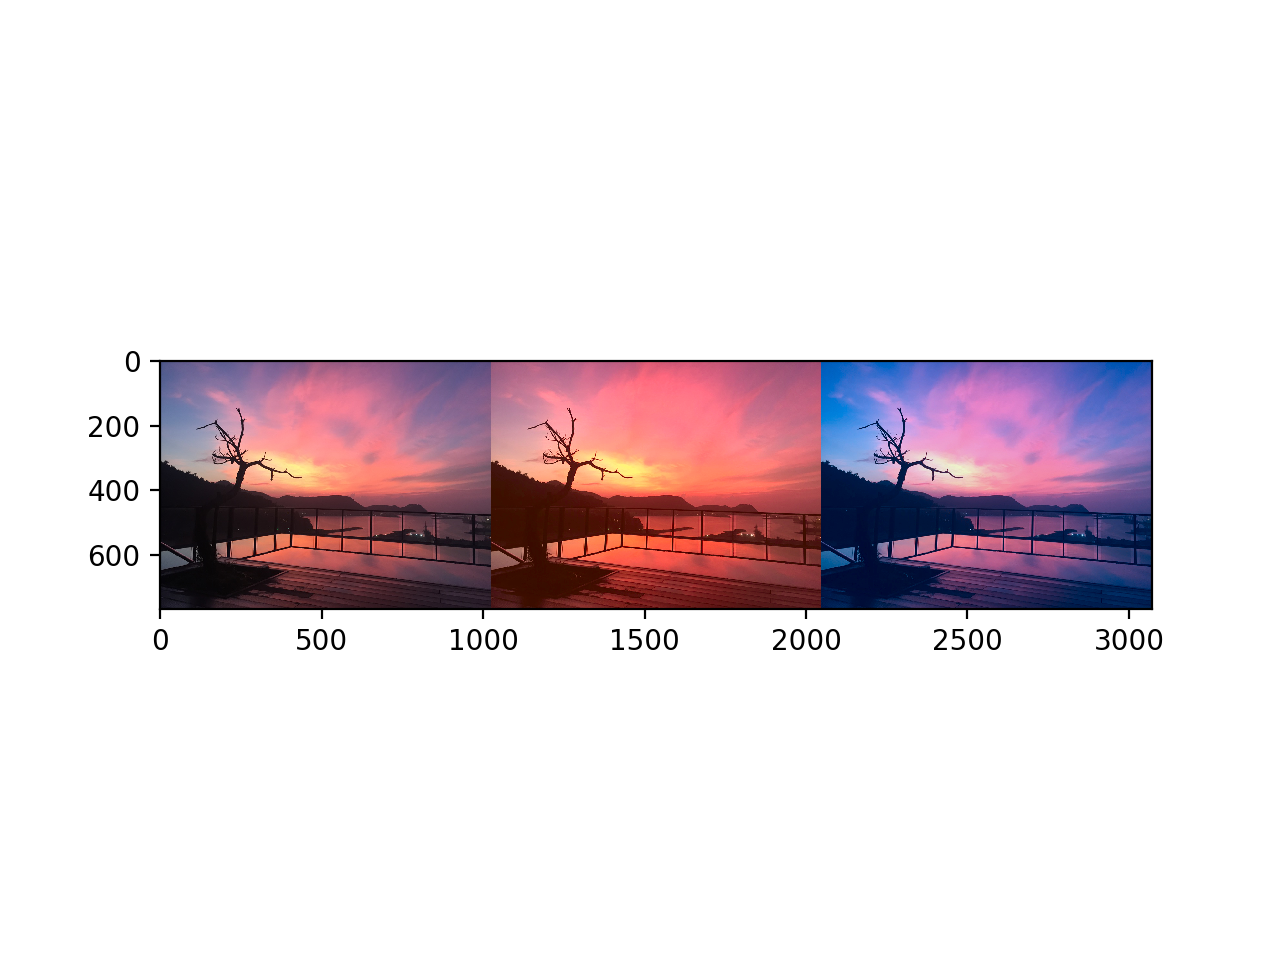

True

In [17]:
img = cv2.imread('images/sunrise.jpg')
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Increase A channel value (make it redder)
img_redder = np.array(img_lab)
img_redder = img_redder.astype(np.float32) + 20
img_redder[np.where(img_redder > 255)] = 255
img_redder = img_redder.astype(np.uint8)

# Decrease B channel value (make it less yellow)
img_not_so_yellow = np.array(img_lab).astype(np.float32)
img_not_so_yellow[:, :, 2] -= 30
img_not_so_yellow[np.where(img_not_so_yellow < 0)] = 0
img_not_so_yellow = img_not_so_yellow.astype(np.uint8)

# Convert the LAB image back to RGB format
img_redder = cv2.cvtColor(img_redder, cv2.COLOR_LAB2BGR)
img_not_so_yellow = cv2.cvtColor(img_not_so_yellow, cv2.COLOR_LAB2BGR)

res = np.hstack((img, img_redder, img_not_so_yellow))
res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(res_rgb)
cv2.imwrite('results/color-adjust.png', res)

### Part III: Bells and Whistles

#### Gaussian and Laplacian Pyramids

In [18]:
def gaussian_pyramid(im, freq, level=5):
    fig,  axes  = plt.subplots(1, level)
    fig1, axes1 = plt.subplots(1, level-1)
    
    low_pass = utils.gaussian_kernel(freq, 3 * freq) 
    
    axes[0].imshow(im)
    axes[0].set_xticks([]), axes[0].set_yticks([])   
    
    im_blurred = im
    for l in range(level-1):
        im_subsampled = correlate2d(low_pass, im_blurred, mode='same')
        im_laplacian = im_blurred - im_subsampled + 127
        im_subsampled = im_subsampled[::2, ::2]
        
        im_laplacian[np.where(im_laplacian > 255)] = 255
        im_blurred = im_subsampled
        
        axes[l+1].imshow(im_subsampled.astype(np.uint8))
        axes[l+1].set_xticks([]), axes[l+1].set_yticks([])
        
        axes1[l].imshow(im_laplacian.astype(np.uint8))
        axes1[l].set_xticks([]), axes1[l].set_yticks([])
        
    return fig, fig1

<IPython.core.display.Javascript object>


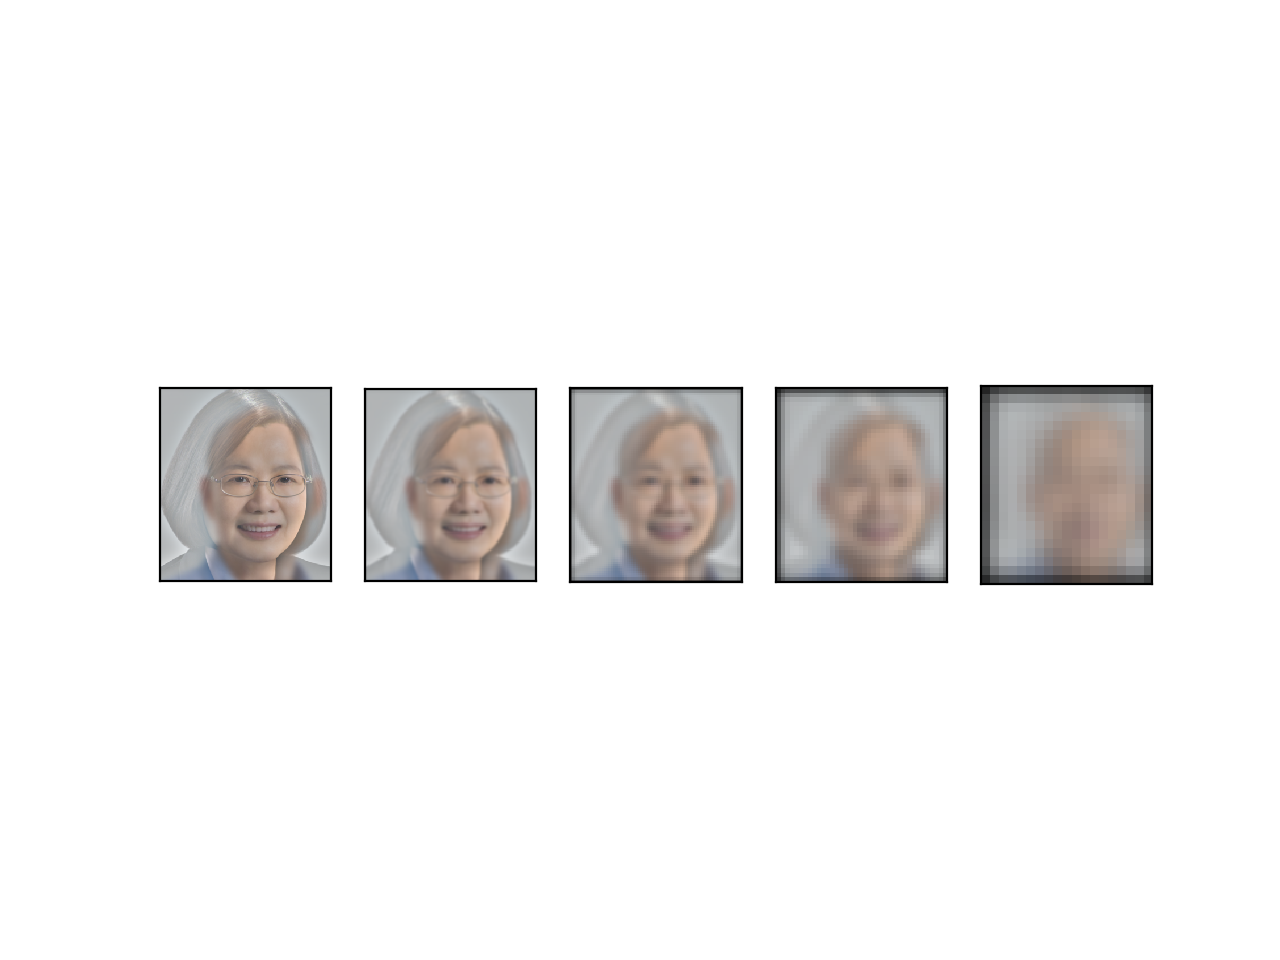

<IPython.core.display.Javascript object>


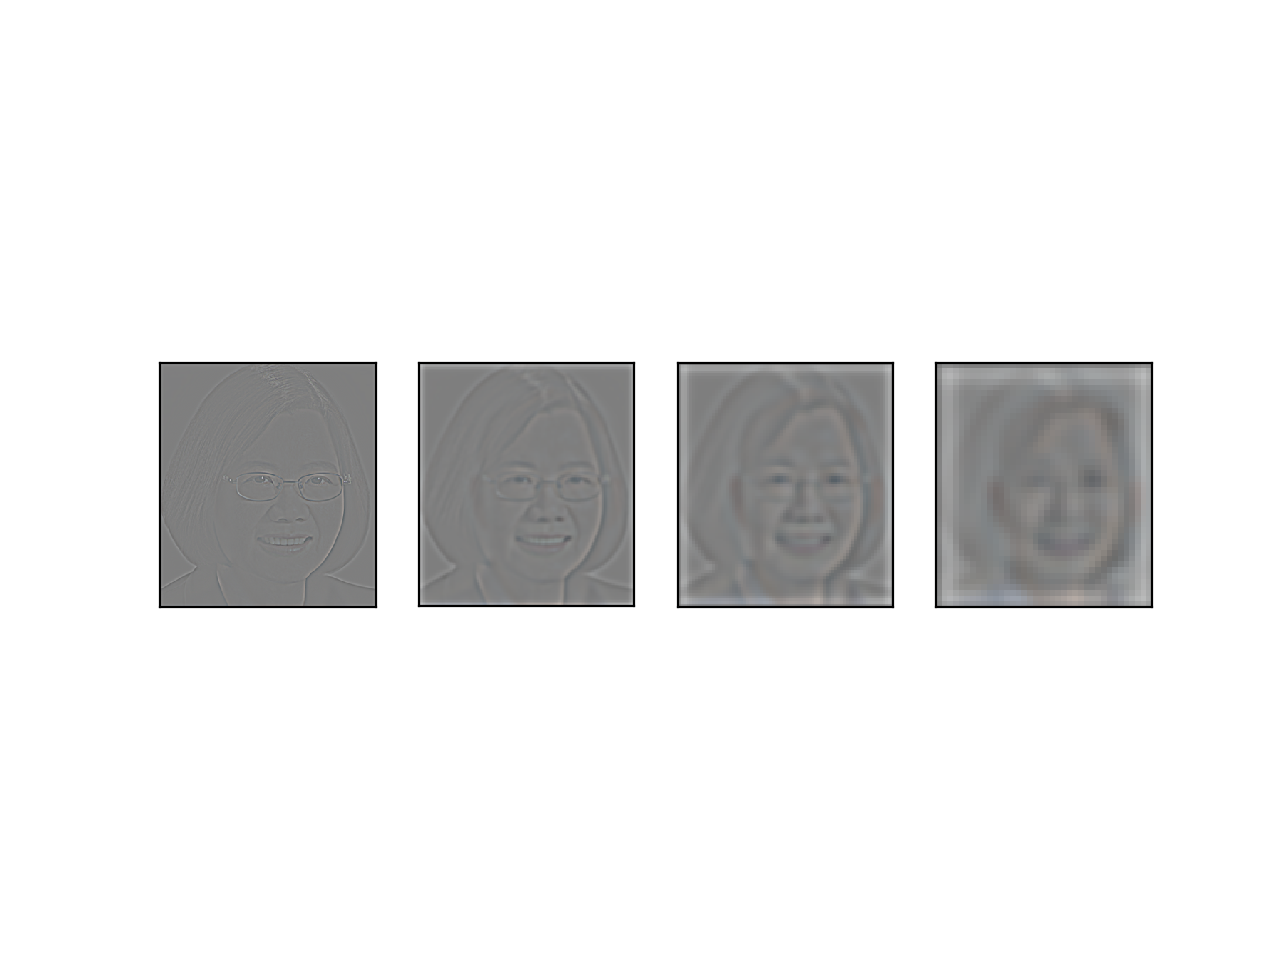

In [22]:
fig, fig1 = gaussian_pyramid(cropped_object['cropped_image'], 2, level=5)

In [21]:
# fig.savefig(os.path.join(res_dir, "gauss_pyramid.png"))
# fig1.savefig(os.path.join(res_dir, "lap_pyramid.png"))